In [3]:

import numpy as np 
import pandas as pd 
import warnings



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

/kaggle/input/sales-forecasting/train.csv


# Dataset Loading

In [4]:
df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")
df.head(8)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520


In [18]:
# print out the columns of the dataset
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [19]:
# Gets the information about rows and columns
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [20]:
# statistical summary
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Cleaning Dataset Missing Values

## Method One

In [22]:
# number of the missing values in each column
df.isnull().sum().sort_values(ascending=False)

Postal Code      11
Row ID            0
Order ID          0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Sales             0
dtype: int64

* As shown, there are 18 columns, and 9800 record of sales
* 11 missing values from Postal Code column 
* he main column is "Sales" with the lowest sale being 0.444 and the highest sale being 22,638.480. The average sales value is 230.769

In [ ]:
# check the duplicated values
df.duplicated().any()

In [ ]:
# Dropping records with the empty cells
df.dropna(axis=0, inplace=True)

# Check the dataset again for empty cells
print(df.isnull().sum().sort_values(ascending=False))

In [67]:
df[df['Postal Code'].isnull()]

## Method Two 

In [3]:
# As noticed, the postal code is missing from the records of the city of Burlington and the state of Vermont
df[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [5]:
warnings.filterwarnings('ignore')
postal_code = df.loc[df["City"] == "Burlington"]["Postal Code"]
postal_code = round(postal_code.sum() / postal_code.count(), 0)
print(postal_code)
df["Postal Code"].fillna(postal_code, inplace = True)

32656.0


In [5]:
df[df["State"] == "Vermont"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,32656.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,32656.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,32656.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,32656.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,32656.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,32656.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,32656.0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,32656.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,32656.0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,32656.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


# Exploratory Data Analysis (EDA) 

In [7]:
# these the top 10 customers in terms of sales
top_10_customers = df.groupby(["Customer ID", "Segment"])["Sales"].sum().sort_values(ascending=False).head(10)
top_10_customers

Customer ID  Segment    
SM-20320     Home Office    25043.050
TC-20980     Corporate      19052.218
RB-19360     Consumer       15117.339
TA-21385     Home Office    14595.620
AB-10105     Consumer       14473.571
KL-16645     Consumer       14175.229
SC-20095     Consumer       14142.334
HL-15040     Consumer       12873.298
SE-20110     Consumer       12209.438
CC-12370     Consumer       12129.072
Name: Sales, dtype: float64

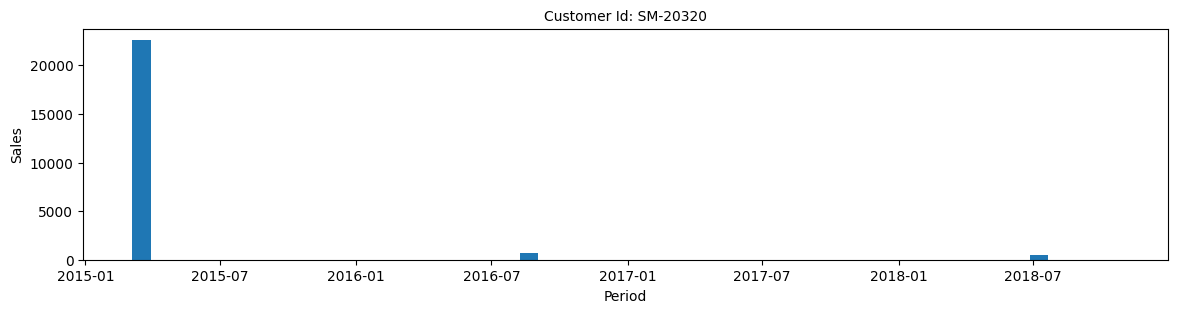

	 Sales over a period of 42.84 months totaled $25043.05 




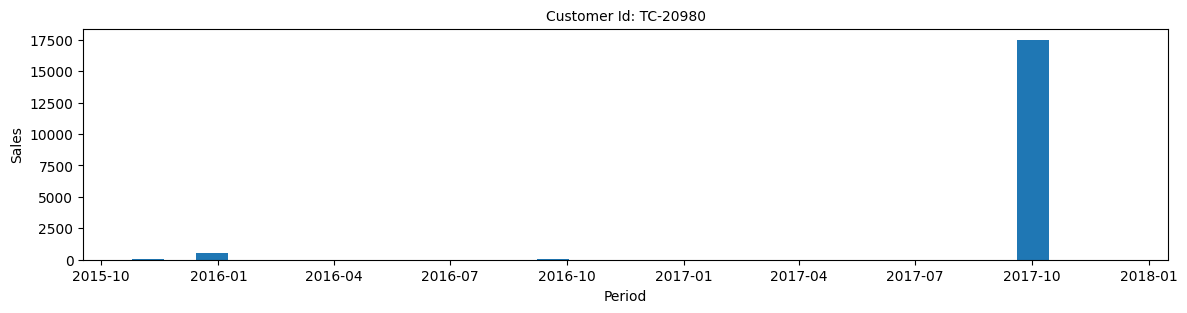

	 Sales over a period of 24.64 months totaled $19052.22 




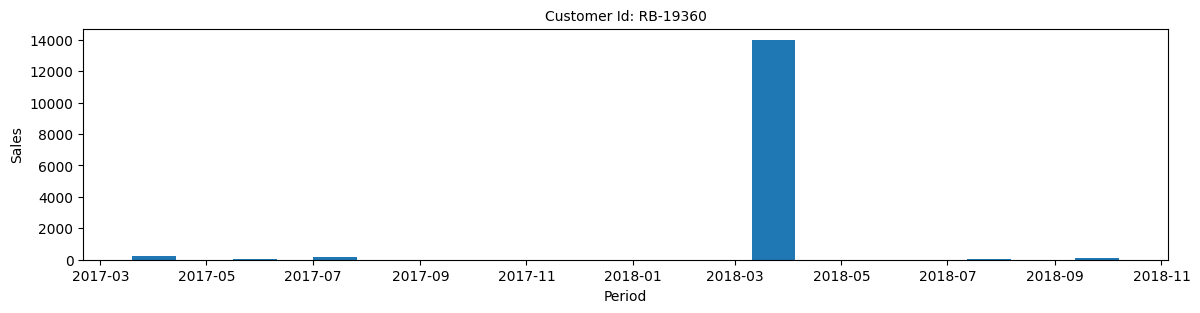

	 Sales over a period of 17.81 months totaled $15117.34 




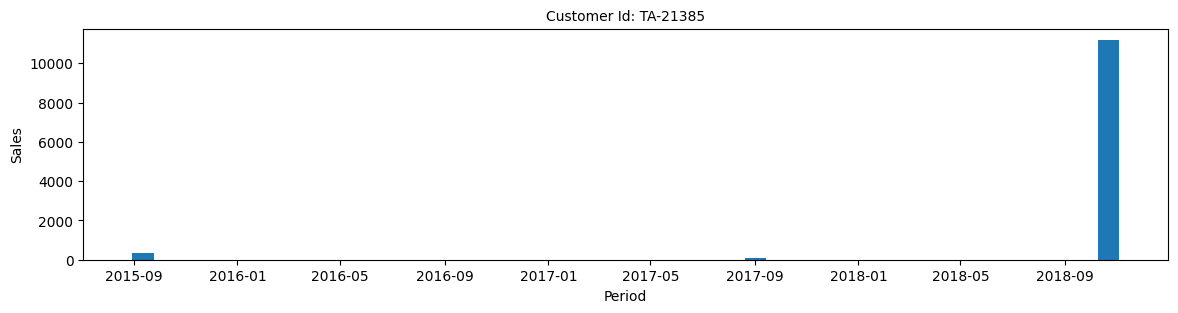

	 Sales over a period of 37.32 months totaled $14595.62 




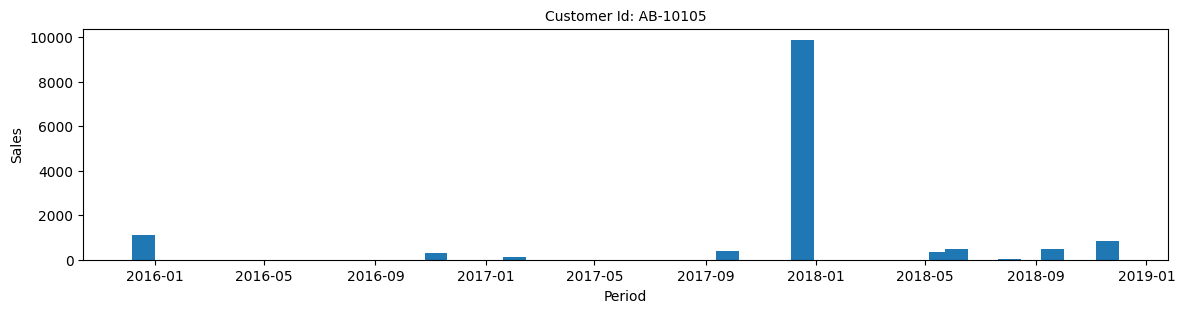

	 Sales over a period of 34.99 months totaled $14473.57 




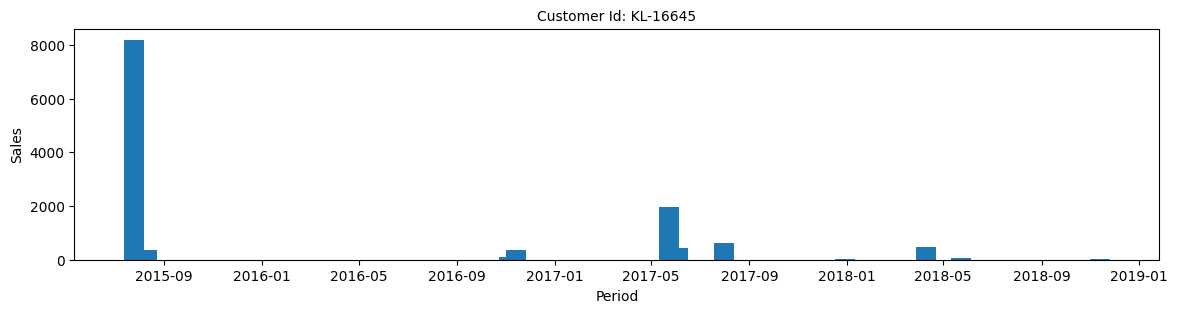

	 Sales over a period of 39.65 months totaled $14175.23 




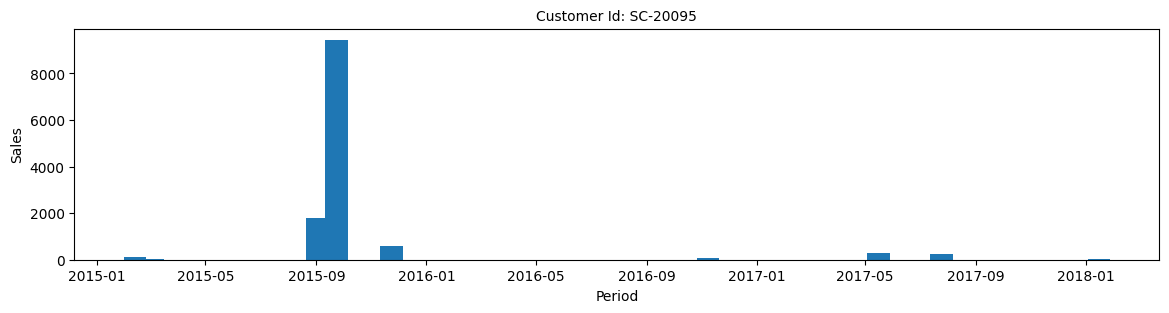

	 Sales over a period of 35.09 months totaled $14142.33 




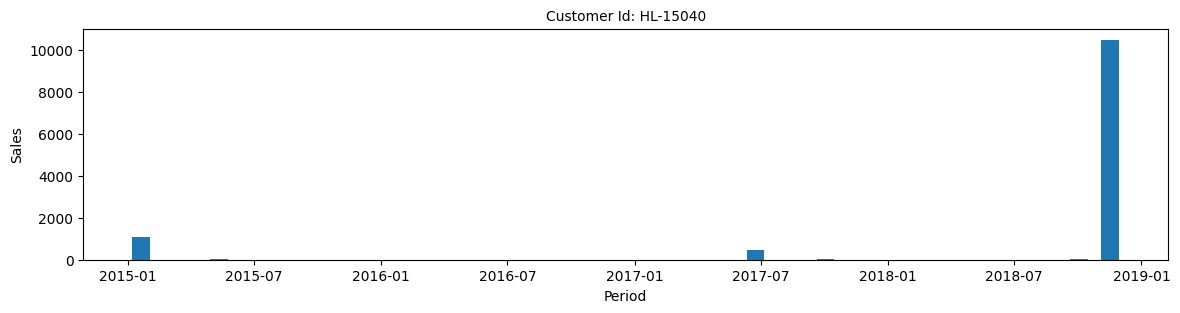

	 Sales over a period of 45.89 months totaled $12873.3 




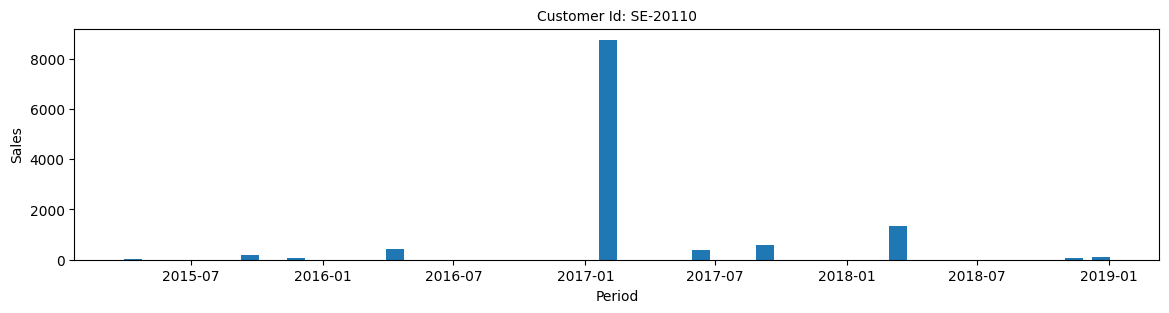

	 Sales over a period of 44.35 months totaled $12209.44 




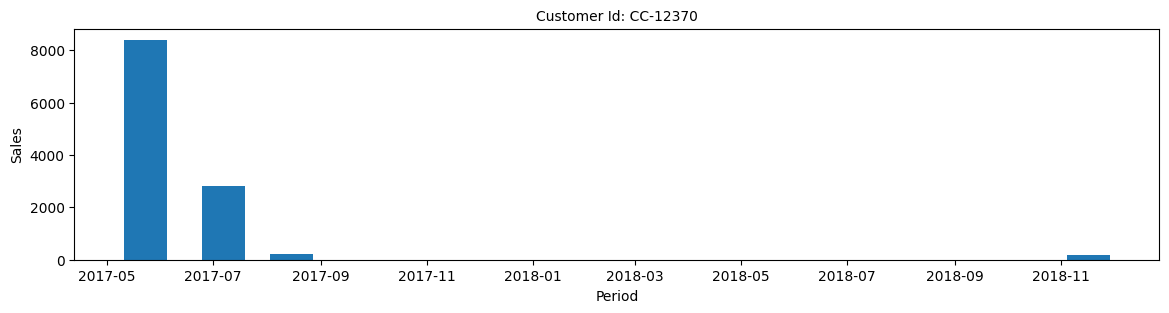

	 Sales over a period of 17.84 months totaled $12129.07 




In [8]:
from matplotlib import pyplot as plt 

for id in top_10_customers.index: 
    plt.figure(figsize = (14,3)) 
    plt.title("Customer Id: {x}".format(x=id[0]), fontsize = 10) 
    plt.xlabel("Period", ) 
    plt.ylabel("Sales") 
    plt.bar(pd.to_datetime(df[df["Customer ID"] == id[0]]["Order Date"], format = "%d/%m/%Y"), np.round(df[df["Customer ID"] == id[0]]["Sales"].values, 2), width=25)
    plt.show()
    
    y = pd.to_datetime(df[df["Customer ID"] == id[0]]["Order Date"], format = "%d/%m/%Y").sort_values(ascending=False).values

    # Average number of nanoseconds in a month
    nanoseconds_per_month = 30.44 * 24 * 60 * 60 * 1e9 
    months = np.round((y[0] - y[-1]) / np.timedelta64(int(nanoseconds_per_month), 'ns'), 2)

    print(color.BOLD + "\t Sales over a period of {months} months totaled ${sales} \n\n".format(months = months, sales = np.round(df[df["Customer ID"] == id[0]]["Sales"].values.sum(), 2)))
    


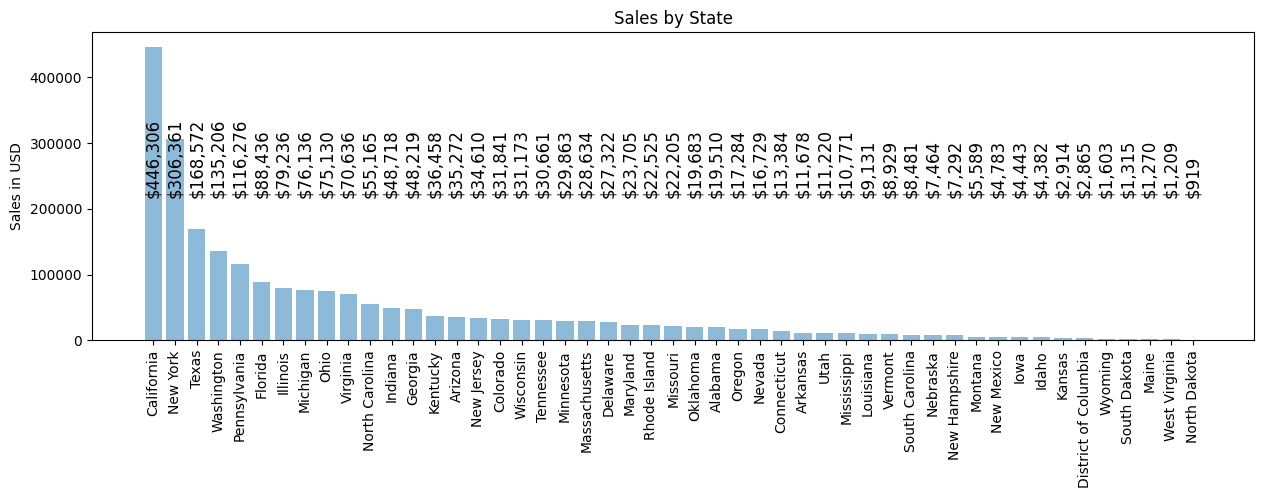

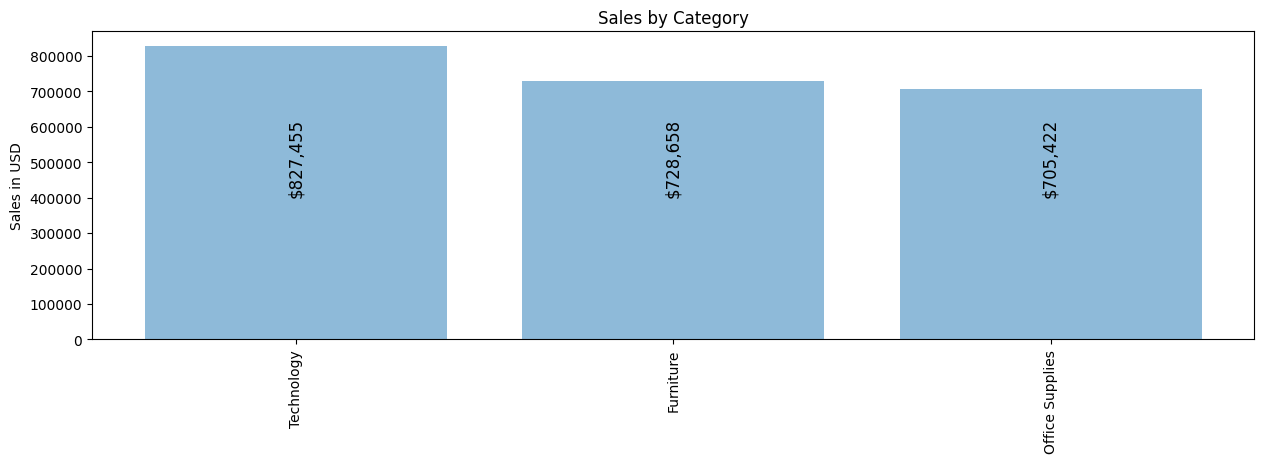

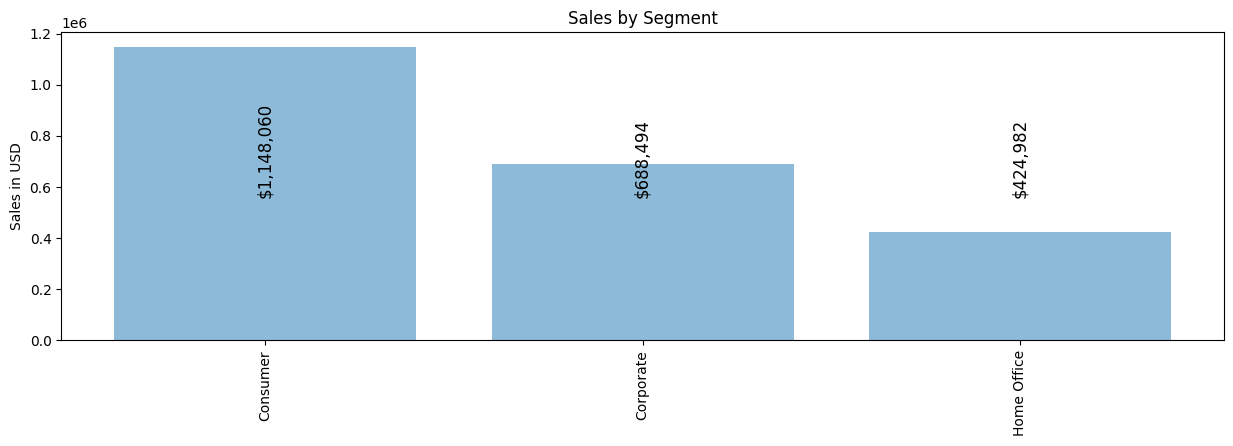

In [45]:
for i in ["State", "Category", "Segment"]: 
    sales_grouped = df.groupby(i)["Sales"].sum()
    sales_grouped.sort_values(ascending= False, inplace=True)
    sales_grouped.head(30) 
    plt.figure(figsize = (15,4)) 
    plt.title('Sales by {}'.format(i))
    plt.ylabel('Sales in USD')
    plt.bar(sales_grouped.index, sales_grouped, alpha = 0.5)
    plt.xticks(rotation=90)
    for x,y in sales_grouped.items():
        plt.text(x,sales_grouped.max()/2, f'${int(y):,.0f}', rotation=90, horizontalalignment='center', fontsize=12)
    plt.show
    

# Predicting LSTM

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Grouping the data and resetting the index
sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index()

# Initialize the DataFrame outside the loop
forecasted_sales = pd.DataFrame(columns=["Category", "Forecasted_Sales_2020"])
target_year = 2020

for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    
    # Scale the 'Sales' data
    scaler = MinMaxScaler()
    category_data['Sales'] = scaler.fit_transform(category_data['Sales'].values.reshape(-1, 1))
    
    # Prepare the features and target for the LSTM model
    X = category_data['Sales'].values
    y = category_data['Sales'].values
    X = X.reshape((X.shape[0], 1, 1))
    
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # Fit the model
    model.fit(X, y, epochs=100, batch_size=16, verbose=0)
    
    # Prepare the forecast data
    forecast_data = np.array([scaler.transform([[target_year]])])
    forecast_data = forecast_data.reshape((1, 1, 1))
    
    # Make the forecast
    forecast = model.predict(forecast_data)
    forecast = scaler.inverse_transform(forecast.reshape(-1, 1))[0][0]
    
    # Add the forecast to the forecasted_sales DataFrame
    new_row = pd.DataFrame({
        "Category": [category],
        "Forecasted_Sales_2020": [forecast]
    })
    forecasted_sales = pd.concat([forecasted_sales, new_row], ignore_index=True)

# Format the 'Forecasted_Sales_2020' column
forecasted_sales["Forecasted_Sales_2020"] = forecasted_sales["Forecasted_Sales_2020"].apply(lambda x: '{:,.2f}'.format(x))

# Print the forecasted sales
print("Forecasted Sales in 2020 for Each Product Category:")
print(forecasted_sales)

2024-07-19 05:38:17.449263: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 05:38:17.449435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 05:38:17.608383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Forecasted Sales in 2020 for Each Product Category:
          Category Forecasted_Sales_2020
0        Furniture            148,085.81
1  Office Supplies            127,111.12
2       Technology            138,650.41


# 